In [6]:
#Synthetic data creation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

np.random.seed(42)
dates = pd.date_range(start='2020-01-01', periods=365, freq='D')
trend = np.linspace(0, 10, 365)
seasonality = 5 * np.sin(2 * np.pi * np.arange(365) / 365)
residuals = np.random.normal(0, 1, 365)
synthetic_data = trend + seasonality + residuals

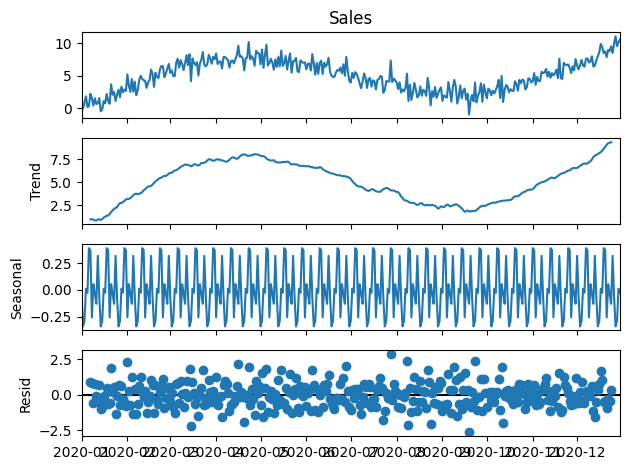

In [13]:
#Decomposition

df = pd.DataFrame({'Date': dates, 'Sales': synthetic_data})
df.set_index('Date', inplace=True)

decomposition = seasonal_decompose(df['Sales'], model='additive', period=12)
decomposition.plot()
plt.show()

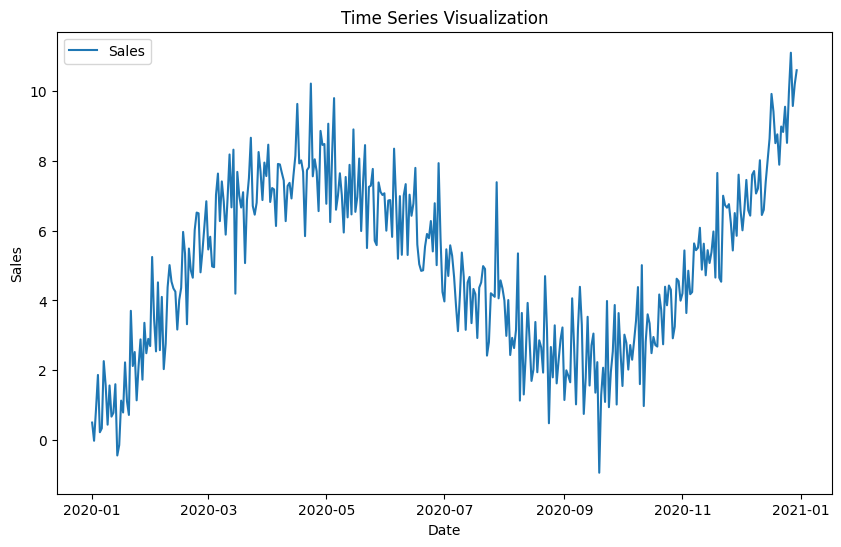

In [14]:
#Visualization

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Sales'], label='Sales')
plt.title('Time Series Visualization')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [35]:
#Stationarity test

from statsmodels.tsa.stattools import adfuller, kpss

adf_result = adfuller(df['Sales'])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:', adf_result[4])

kpss_result = kpss(df['Sales'])
print('\nKPSS Statistic:', kpss_result[0])
print('p-value:', kpss_result[1])
print('Critical Values:', kpss_result[3])

ADF Statistic: -0.628816658744133
p-value: 0.8643368037088902
Critical Values: {'1%': -3.448748905151901, '5%': -2.8696473721448728, '10%': -2.5710891239349585}

KPSS Statistic: 0.3439443793623372
p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


C:\Users\Admin\AppData\Local\Temp\ipykernel_11880\353290203.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(df['Sales'])


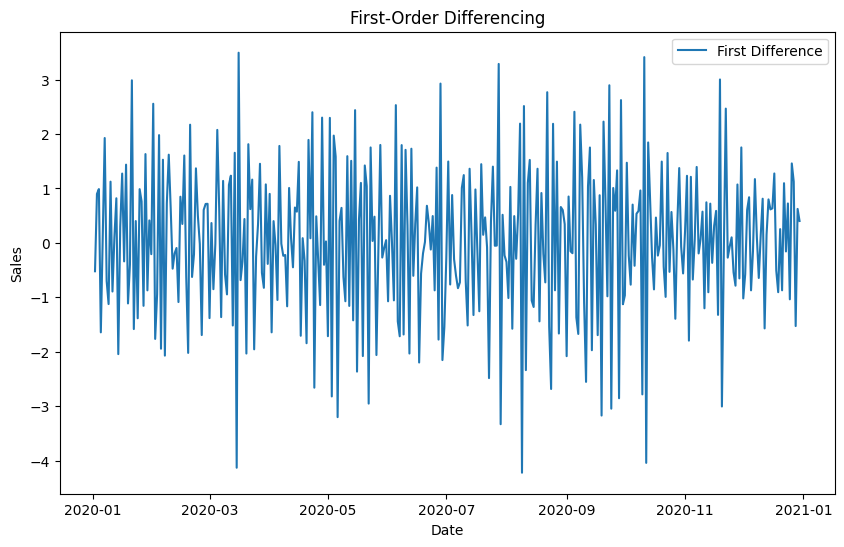

ADF Statistic (Differenced): -13.022413840042455
p-value (Differenced): 2.4383012950317507e-24


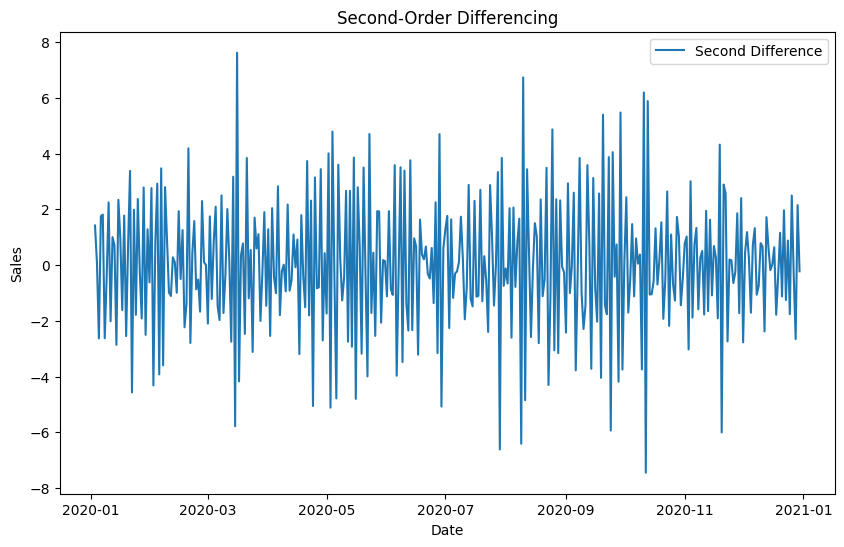

ADF Statistic (2nd-Differenced): -10.314650084190063
p-value (2nd-Differenced): 3.1201214671641933e-18


In [36]:
#Differencing

df['First_Difference'] = df['Sales'].diff().dropna()

plt.figure(figsize=(10, 6))
plt.plot(df['First_Difference'], label='First Difference')
plt.title('First-Order Differencing')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

adf_result_diff = adfuller(df['First_Difference'].dropna())
print('ADF Statistic (Differenced):', adf_result_diff[0])
print('p-value (Differenced):', adf_result_diff[1])

df['Second_Difference'] = df['First_Difference'].diff().dropna()

plt.figure(figsize=(10, 6))
plt.plot(df['Second_Difference'], label='Second Difference')
plt.title('Second-Order Differencing')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

adf_result_diff = adfuller(df['Second_Difference'].dropna())
print('ADF Statistic (2nd-Differenced):', adf_result_diff[0])
print('p-value (2nd-Differenced):', adf_result_diff[1])

<Figure size 1000x600 with 0 Axes>

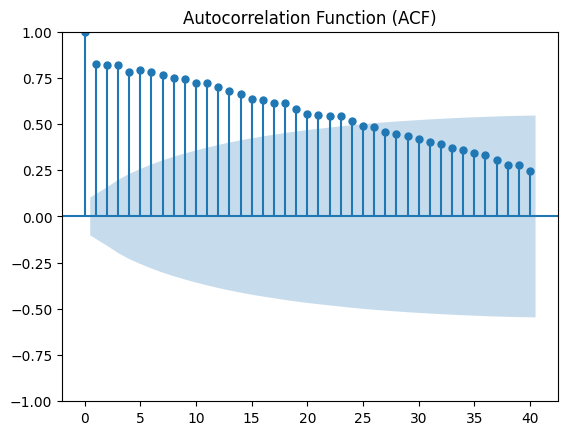

<Figure size 1000x600 with 0 Axes>

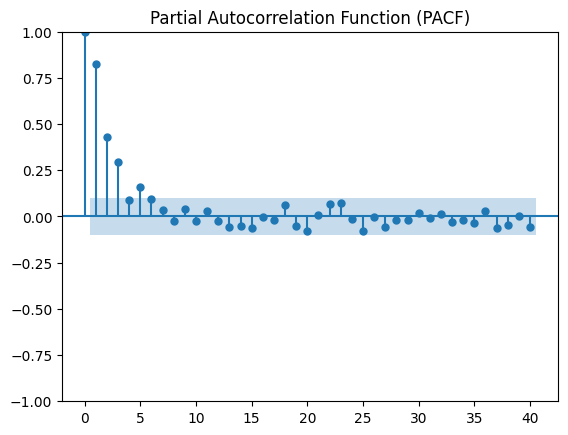

In [21]:
#ACF 4 PACF

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(10, 6))
plot_acf(df['Sales'], lags=40, title='Autocorrelation Function (ACF)')
plt.show()

plt.figure(figsize=(10, 6))
plot_pacf(df['Sales'], lags=40, title='Partial Autocorrelation Function (PACF)')
plt.show()

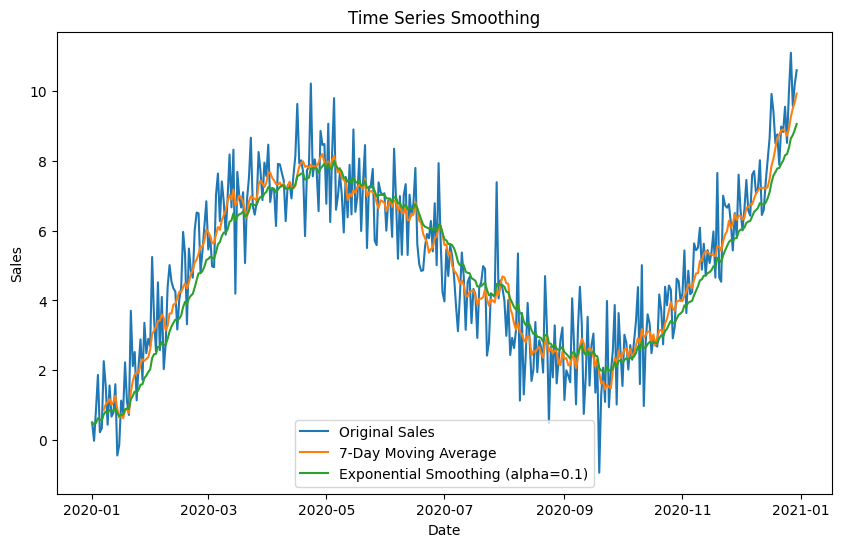

In [22]:
#Smoothing

df['MA_7'] = df['Sales'].rolling(window=7).mean()

df['ES_0.1'] = df['Sales'].ewm(alpha=0.1, adjust=False).mean()

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Sales'], label='Original Sales')
plt.plot(df.index, df['MA_7'], label='7-Day Moving Average')
plt.plot(df.index, df['ES_0.1'], label='Exponential Smoothing (alpha=0.1)')
plt.title('Time Series Smoothing')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()